In [6]:
# %config Completer.use_jedi = False

In [17]:
!ls ../labtestonline_datasets/dataset_statics

url_item_static.csv
url_item_static.png
url_item_static_total.csv
url_item_static_total.png


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import requests
import json
import sys
import spacy

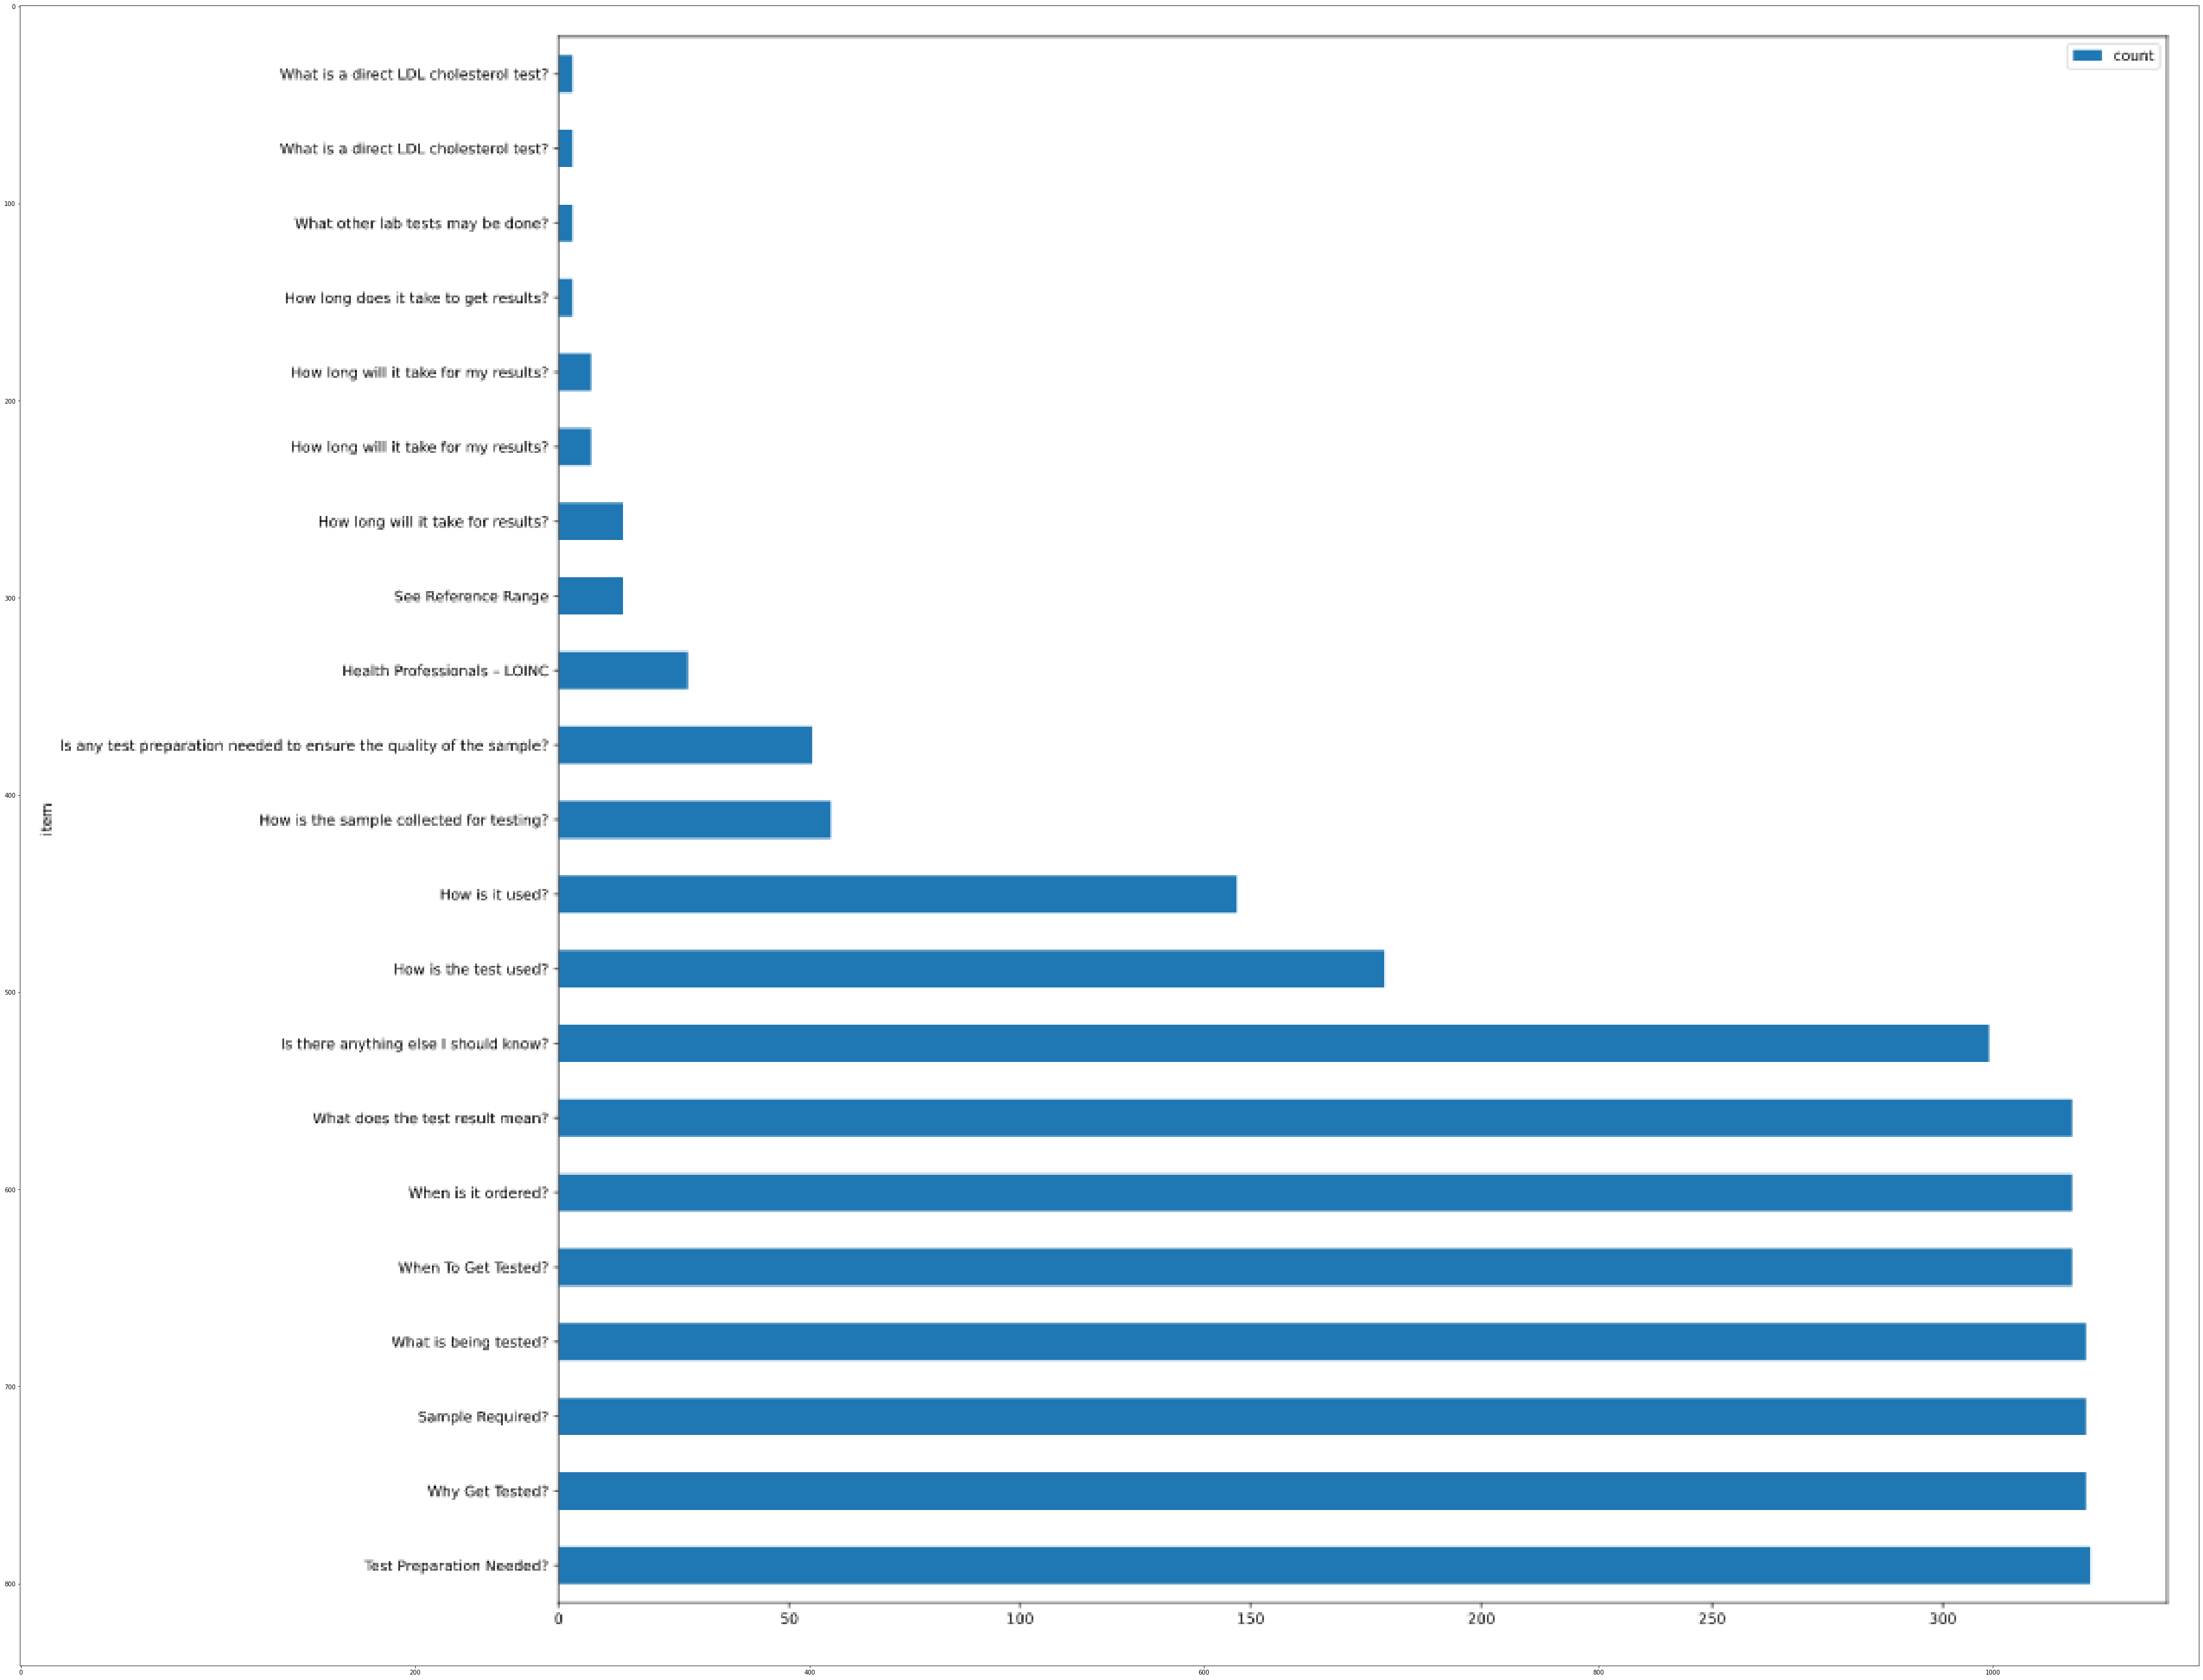

In [24]:
img_dir = '../labtestonline_datasets/dataset_statics/url_item_static.png'
plt.figure(figsize=(65, 65))
img = plt.imread(img_dir)
plt.imshow(img)

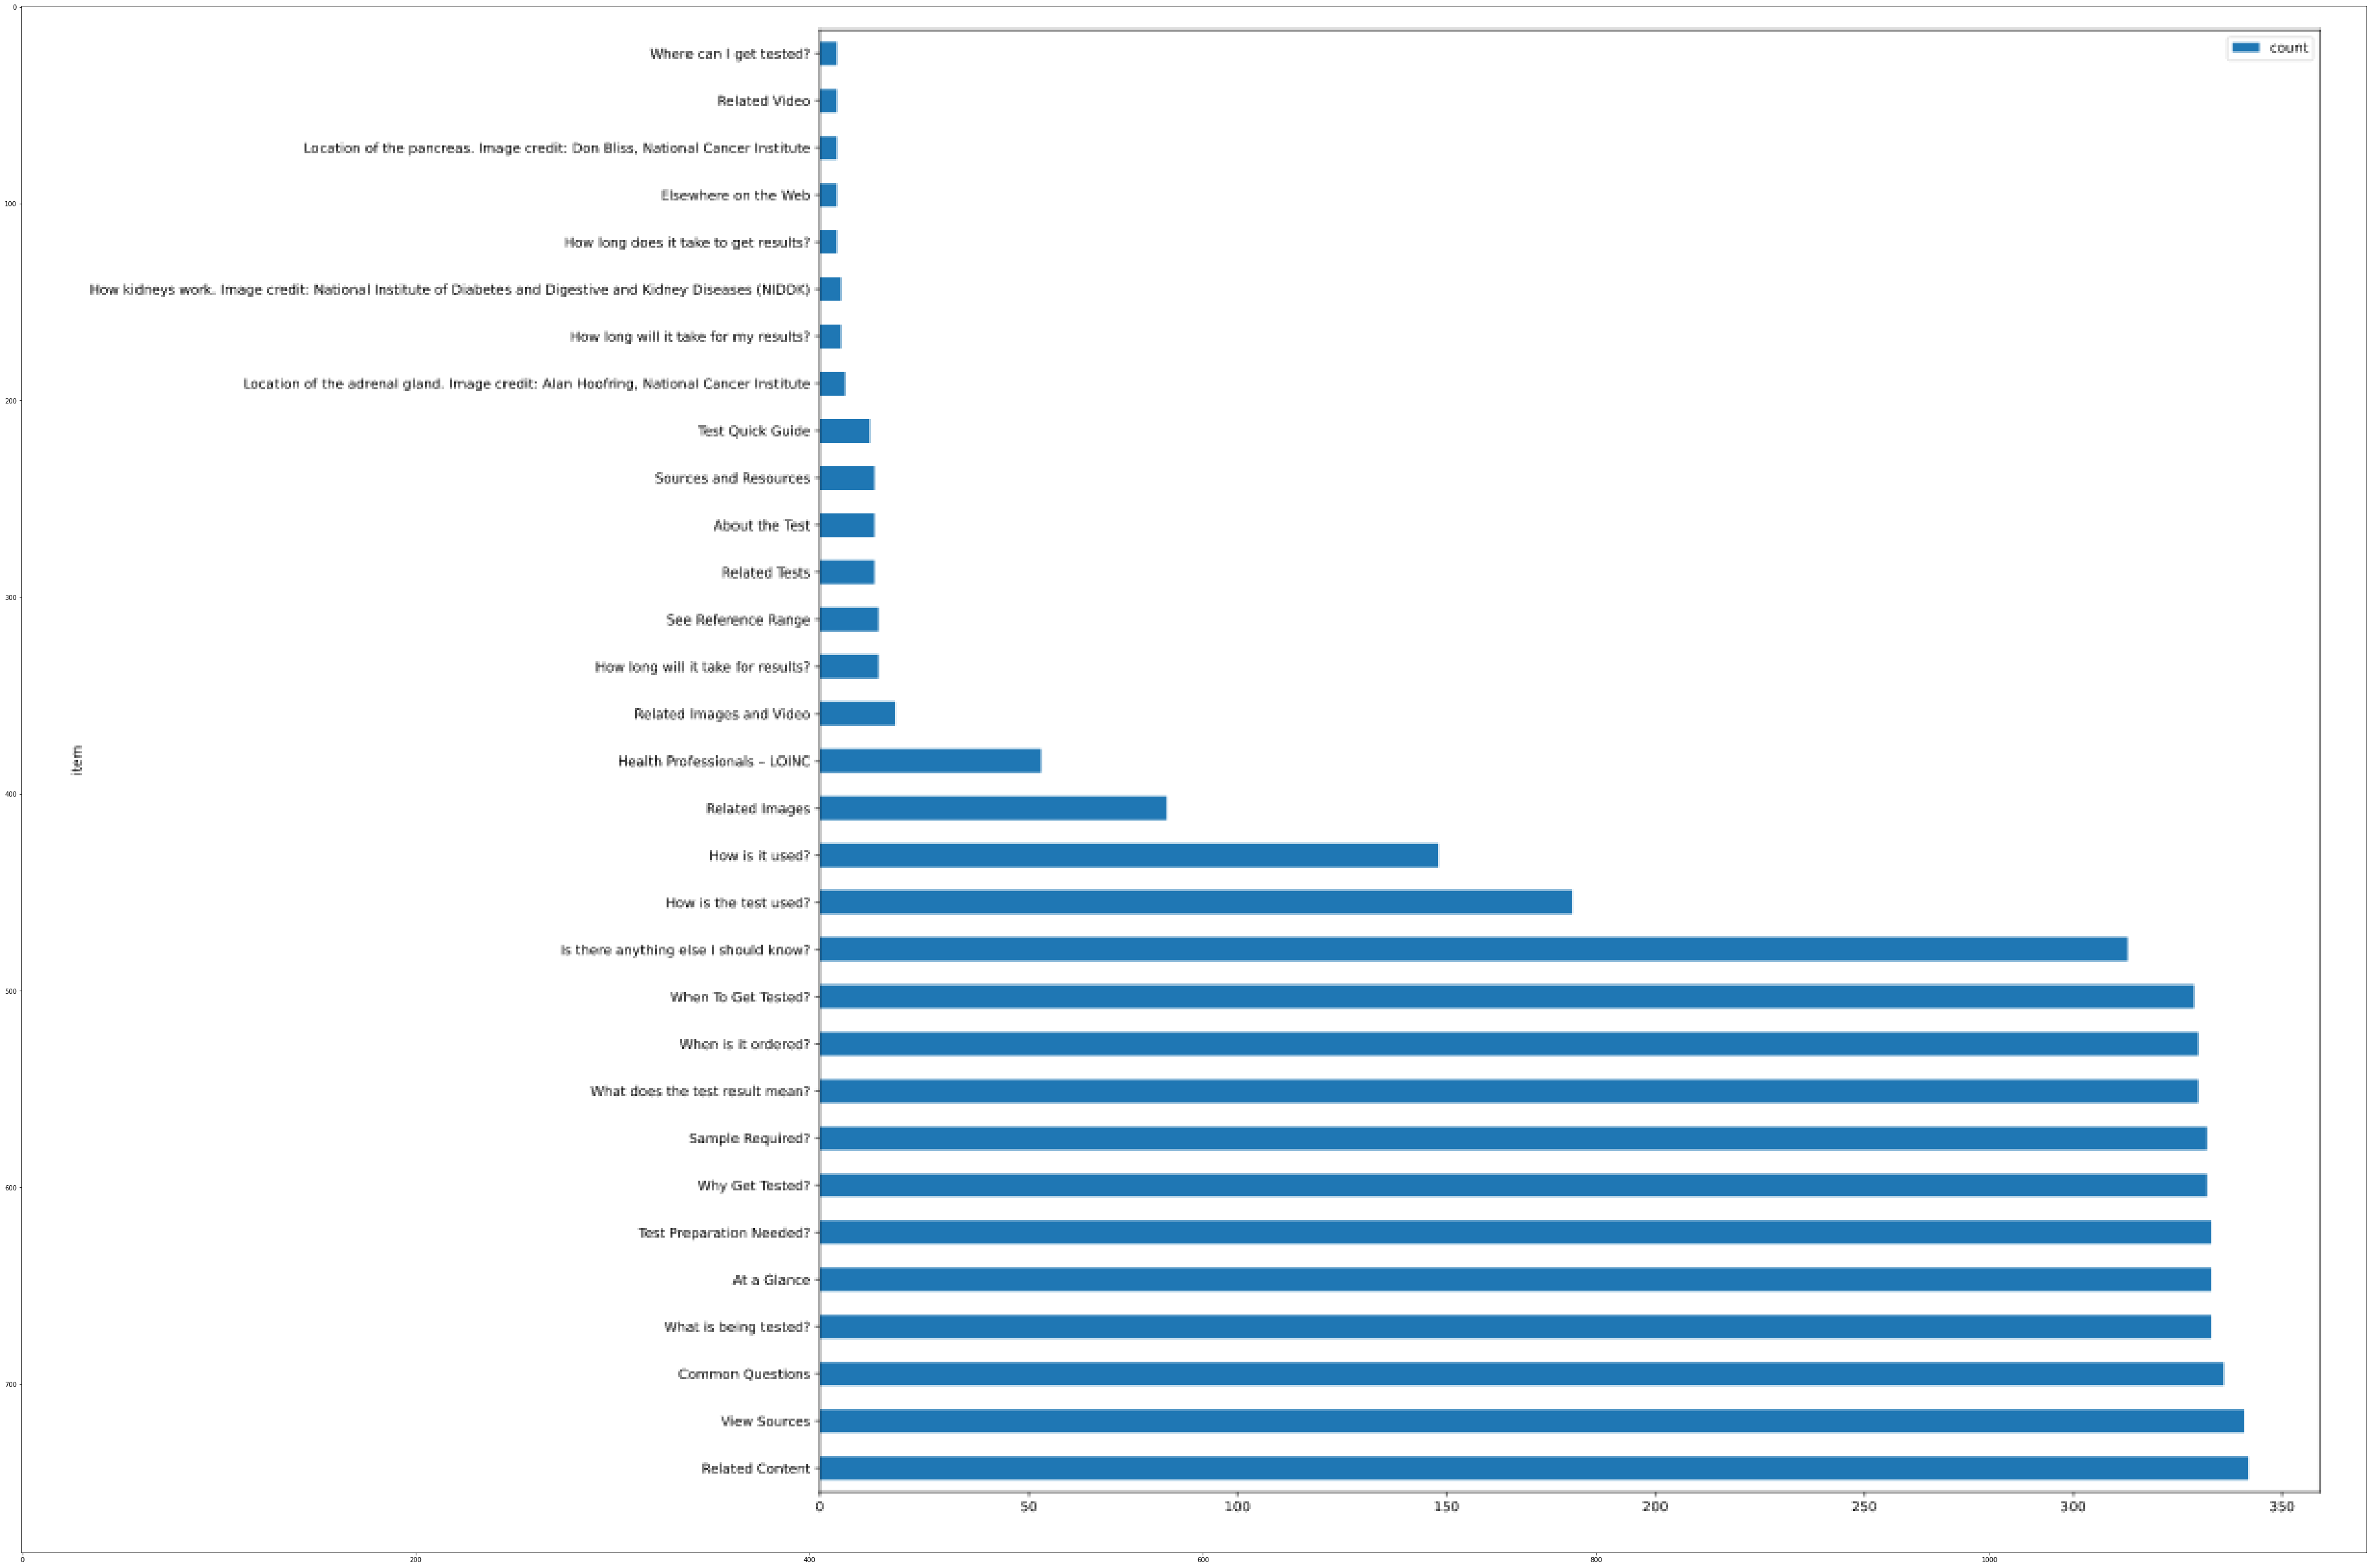

In [25]:
img_dir = '../labtestonline_datasets/dataset_statics/url_item_static_total.png'
plt.figure(figsize=(65, 65))
img = plt.imread(img_dir)
plt.imshow(img)

In [21]:
df = pd.read_csv('../labtestonline_datasets/dataset_statics/url_item_static.csv')

In [23]:
a = 'item'
df[a].values [:2]

array(['Test Preparation Needed?', 'Why Get Tested?'], dtype=object)

In [5]:
questions = df['item'].apply(lambda a: str(a)).values

In [64]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize('\n'.join(questions)))) if hasattr(chunk, 'label') }

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\98938\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\98938\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\98938\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\98938\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{('A1c', 'ORGANIZATION'),
 ('AAT', 'ORGANIZATION'),
 ('ABO', 'ORGANIZATION'),
 ('ACT', 'ORGANIZATION'),
 ('ACTH', 'ORGANIZATION'),
 ('AChR', 'ORGANIZATION'),
 ('ADA', 'ORGANIZATION'),
 ('ADH', 'ORGANIZATION'),
 ('AEDs', 'ORGANIZATION'),
 ('AFB', 'ORGANIZATION'),
 ('AFP', 'ORGANIZATION'),
 ('ALK', 'ORGANIZATION'),
 ('ALT', 'ORGANIZATION'),
 ('AMA', 'ORGANIZATION'),
 ('AMH', 'ORGANIZATION'),
 ('ANCA', 'ORGANIZATION'),
 ('APOE', 'ORGANIZATION'),
 ('ARR', 'ORGANIZATION'),
 ('ASCA', 'ORGANIZATION'),
 ('ASO', 'ORGANIZATION'),
 ('AST', 'ORGANIZATION'),
 ('Abuse Epithelial', 'ORGANIZATION'),
 ('Addison', 'PERSON'),
 ('Alzheimer', 'ORGANIZATION'),
 ('Ascorbic Acid', 'PERSON'),
 ('Average Glucose', 'PERSON'),
 ('B12', 'PERSON'),
 ('B2M', 'PERSON'),
 ('BMP', 'ORGANIZATION'),
 ('BUN', 'ORGANIZATION'),
 ('BUN Reference Range Blood', 'ORGANIZATION'),
 ('Bacteria', 'GPE'),
 ('Bartter', 'PERSON'),
 ('Basophils Besides', 'PERSON'),
 ('Bence Jones', 'PERSON'),
 ('Besides HCV', 'PERSON'),
 ('CA', 'ORGANI

In [85]:
entity_class = ['drag_name', 'test1', 'test2', 'none']

In [35]:
a = [1,2,3]
a[:-1]

[1, 2]

In [42]:
import sys
import pandas as pd
class LabelQuestions():
    def __init__(self, cv_path=None, questions_column_name=None, intent_tag_list=[]):
        if cv_path == None:
            raise Exception("Error: [path] can't be empty.")
        if intent_tag_list==[]:
            raise Exception("Error: [intent_tag_list] can't be empty")
        if questions_column_name==None:
            raise Exception("Error: [questions_column_name] can't be empty")
            
        self.path = cv_path
        self.tag_list = intent_tag_list
        self.questions = pd.read_csv(self.path)[questions_column_name].values
        self.intents = []
    def run(self, saved_name=None):
        print('Whats these questions intent?')
        print('Current intent list: ' , self.tag_list)
        print('Print "finish" to finish labeling.')
        counter = 0
        for q in self.questions:
            intent = ''
            while(not intent in self.tag_list):
                intent = input('Type intent for this question: [ '+q+' ]')
                if intent=='finish':
                    self.finishing(counter, saved_name)
                    return
                if intent in self.tag_list:
                    self.intents.append(intent)
                    break
                else :
                    print('ERROR: I done have this tag in our list type one of current intent list.')
            counter += 1
        print(self.intents)
        
    def finishing(self, counter, saved_name):
        self.df = pd.DataFrame(list(zip(self.questions[:counter],self.intents)), columns=['question', 'intent'])
        if saved_name:
            self.df.to_csv('/'.join(self.path.split('/')[:-1])+'/'+saved_name, index=False)
def main():
    args = sys.argv
    intent_tag_list = ['usage_lab','detail_lab','need_lab','during_lab','prepare_lab','risk_lab','result_lab','any_detail_lab']
    LabelQuestions(cv_path=args[1], questions_column_name=args[2], intent_tag_list=intent_tag_list).run(args[3])  
if __name__ == '__main__':
    main()


Whats these questions intent?
Current intent list:  ['yes', 'no', 'maby']
Print "finish" to finish labeling.
Type intent for this question: [ Test Preparation Needed? ]yes
Type intent for this question: [ Why Get Tested? ]no
Type intent for this question: [ Sample Required? ]finish


In [41]:
!ls

Untitled.ipynb


In [ ]:
print('Entity list: ', str(entity_class))
for q in questions[:1]:
    print(str(q))
    for word in q.split(' '):
        print("Whats this word entity: %s " % word)
        w_entity = input()

In [4]:
nlp = spacy.load('en_core_web_sm')

In [10]:
text = ' '.join(questions[:20])
text

'Test Preparation Needed? Why Get Tested? Sample Required? What is being tested? When To Get Tested? When is it ordered? What does the test result mean? Is there anything else I should know? How is the test used? How is it used? How is the sample collected for testing? Is any test preparation needed to ensure the quality of the sample? Health Professionals – LOINC See Reference Range How long will it take for results? How long will it take for my results? How long will it take for my results? How long does it take to get results? What other lab tests may be done? What is a direct LDL cholesterol test?'

In [11]:
doc = nlp(' '.join(questions))

In [7]:
from spacy import displacy

In [12]:
displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
